# BAF507E Finanacial Database - Week1, #2

## Subject : Stock Price Chart

## 조성은 (ID : 20204150)

## 0. Data Download

딥서치에 로그인 하셔서 검색창에 아래 쿼리를 입력한 후 데이터를 다운로드 받습니다

삼성전자 주가 2000-2050

https://www.deepsearch.com/analytics/compute?input=삼성전자+주가+2000-2050#queries

그리고 아래 쿼리를 실행해서 LG전자의 주가도 다운로드 받습니다

    LG전자 주가 2000-2050
    
https://www.deepsearch.com/analytics/compute?input=LG전자+주가+2000-2050#queries

## 1. Loading an excel file using pandas

다운로드 받은 각 파일을 Samsung_stock_price.xlsx로 변경하고, Jupyter Notebook 아래 /data 라는 서브 폴더를 만들어 저장합니다

In [1]:
import pandas as pd

In [4]:
df_samsung = pd.read_excel('samsung_stock_price.xlsx', sheet_name='#03 Computed Result')

In [5]:
df_samsung.head()

,date,symbol,entity_name,주가 2000-2050
0,2000-01-04,KRX:005930,삼성전자,6110
1,2000-01-05,KRX:005930,삼성전자,5580
2,2000-01-06,KRX:005930,삼성전자,5620
3,2000-01-07,KRX:005930,삼성전자,5540
4,2000-01-10,KRX:005930,삼성전자,5770


In [7]:
df_samsung.tail()

,date,symbol,entity_name,주가 2000-2050
5259,2021-04-22,KRX:005930,삼성전자,82400
5260,2021-04-23,KRX:005930,삼성전자,82800
5261,2021-04-26,KRX:005930,삼성전자,83500
5262,2021-04-27,KRX:005930,삼성전자,82900
5263,2021-04-28,KRX:005930,삼성전자,82900


In [8]:
df_samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5264 entries, 0 to 5263
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          5264 non-null   object
 1   symbol        5264 non-null   object
 2   entity_name   5264 non-null   object
 3   주가 2000-2050  5264 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 164.6+ KB


## 2. Convert date-string to a legitimate date type

In [10]:
df_samsung.loc[0]['date']

'2000-01-04'

In [11]:
type(df_samsung.loc[0]['date'])

str

In [13]:
df_samsung['date'] = pd.to_datetime(df_samsung['date'])

In [14]:
df_samsung.loc[0]

date            2000-01-04 00:00:00
symbol                   KRX:005930
entity_name                    삼성전자
주가 2000-2050                   6110
Name: 0, dtype: object

In [15]:
type(df_samsung.loc[0]['date'])

pandas._libs.tslibs.timestamps.Timestamp

## 3. Replace index with date

In [16]:
df_samsung.head()

,date,symbol,entity_name,주가 2000-2050
0,2000-01-04,KRX:005930,삼성전자,6110
1,2000-01-05,KRX:005930,삼성전자,5580
2,2000-01-06,KRX:005930,삼성전자,5620
3,2000-01-07,KRX:005930,삼성전자,5540
4,2000-01-10,KRX:005930,삼성전자,5770


In [18]:
df_samsung = df_samsung.set_index('date')

In [19]:
df_samsung.head()

,symbol,entity_name,주가 2000-2050
date,,,
2000-01-04,KRX:005930,삼성전자,6110
2000-01-05,KRX:005930,삼성전자,5580
2000-01-06,KRX:005930,삼성전자,5620
2000-01-07,KRX:005930,삼성전자,5540
2000-01-10,KRX:005930,삼성전자,5770


In [20]:
df_samsung.loc['2020-01-10']

symbol          KRX:005930
entity_name           삼성전자
주가 2000-2050         59500
Name: 2020-01-10 00:00:00, dtype: object

### Slicing the dataframe for a range of dates

In [21]:
df_samsung.loc['2010-03-01':'2010-03-10']

,symbol,entity_name,주가 2000-2050
date,,,
2010-03-02,KRX:005930,삼성전자,15400
2010-03-03,KRX:005930,삼성전자,15420
2010-03-04,KRX:005930,삼성전자,15220
2010-03-05,KRX:005930,삼성전자,15500
2010-03-08,KRX:005930,삼성전자,15720
2010-03-09,KRX:005930,삼성전자,15720
2010-03-10,KRX:005930,삼성전자,15680


## 4. Plot a time-series chart

In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt

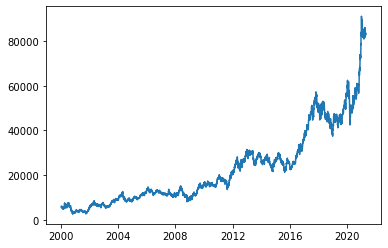

In [24]:
plt.plot(df_samsung['주가 2000-2050'])
plt.show()

### 이건희 회장님 입원 날짜가 2014년 5월 10일 이었는데, 그 전후에 주가에는 어떤 영향이 있었을까요?

In [29]:
df_sub = df_samsung.loc['2014-05-01':'2014-05-31']

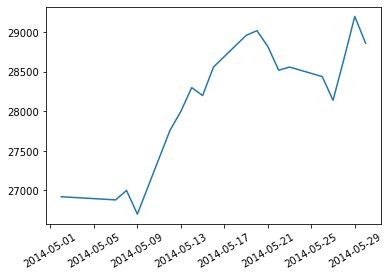

In [31]:
plt.plot(df_sub['주가 2000-2050'])
plt.xticks(rotation=30)
plt.show()

### 한걸음 더 나아가서, 이건희 회장님이 입원하신 날짜를 차트에 annotation 형태로 추가해봅시다

In [34]:
df_samsung.loc['2014-05-10':].head(3)

,symbol,entity_name,주가 2000-2050
date,,,
2014-05-12,KRX:005930,삼성전자,27760
2014-05-13,KRX:005930,삼성전자,28000
2014-05-14,KRX:005930,삼성전자,28300


In [35]:
event = df_sub.loc['2014-05-10':].iloc[0]

In [36]:
event

symbol          KRX:005930
entity_name           삼성전자
주가 2000-2050         27760
Name: 2014-05-12 00:00:00, dtype: object

In [37]:
bbox = dict(boxstyle="round", fc="0.8")

In [44]:
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

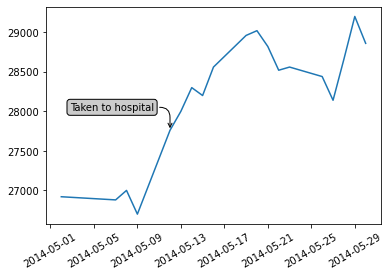

In [45]:
plt.plot(df_sub['주가 2000-2050'])
plt.xticks(rotation=30)
plt.annotate(
    'Taken to hospital',
    xy=(event.name, event['주가 2000-2050']), ## X, Y좌표 설정 (X : event안의 'name'값 / Y : event의 '주가 2000-2050'열값)
    xytext=(-100, 20), ## Annotation의 Offset(위치)
    textcoords='offset points',
    arrowprops=arrowprops,
    bbox=bbox
)
plt.show()

### 1. Merge Samsung and LG Stock Prices together

In [50]:
import pandas as pd

In [51]:
df_samsung = pd.read_excel('samsung_stock_price.xlsx', sheet_name=-1)

In [53]:
df_samsung['date'] = pd.to_datetime(df_samsung['date'])

In [54]:
df_samsung = df_samsung.set_index('date')

In [55]:
df_samsung.head()

,symbol,entity_name,주가 2000-2050
date,,,
2000-01-04,KRX:005930,삼성전자,6110
2000-01-05,KRX:005930,삼성전자,5580
2000-01-06,KRX:005930,삼성전자,5620
2000-01-07,KRX:005930,삼성전자,5540
2000-01-10,KRX:005930,삼성전자,5770


In [57]:
df_lg = pd.read_excel('lg_stock_price.xlsx', sheet_name=-1)

In [58]:
df_lg['date'] = pd.to_datetime(df_lg['date'])

In [59]:
df_lg = df_lg.set_index('date')

In [60]:
df_lg.head()

,symbol,entity_name,주가 2000-2050
date,,,
2002-04-22,KRX:066570,LG전자,62936
2002-04-23,KRX:066570,LG전자,57463
2002-04-24,KRX:066570,LG전자,55704
2002-04-25,KRX:066570,LG전자,51209
2002-04-26,KRX:066570,LG전자,53554


In [66]:
df_samsung = df_samsung.rename(columns={'주가 2000-2050':'samsung'})

In [67]:
df_samsung[['samsung']]

,samsung
date,
2000-01-04,6110
2000-01-05,5580
2000-01-06,5620
2000-01-07,5540
2000-01-10,5770
...,...
2021-04-22,82400
2021-04-23,82800
2021-04-26,83500


In [68]:
df_samsung['samsung'].to_frame()

,samsung
date,
2000-01-04,6110
2000-01-05,5580
2000-01-06,5620
2000-01-07,5540
2000-01-10,5770
...,...
2021-04-22,82400
2021-04-23,82800
2021-04-26,83500


In [69]:
df_samsung = df_samsung[['samsung']]

In [70]:
df_samsung.head()

,samsung
date,
2000-01-04,6110
2000-01-05,5580
2000-01-06,5620
2000-01-07,5540
2000-01-10,5770


In [71]:
df_lg = df_lg.rename(columns={'주가 2000-2050':'lg'})

In [72]:
df_lg = df_lg[['lg']]

In [73]:
df_lg.head()

,lg
date,
2002-04-22,62936
2002-04-23,57463
2002-04-24,55704
2002-04-25,51209
2002-04-26,53554


### Merge the two dataframes

In [81]:
df_merged = df_samsung.join(df_lg)

In [77]:
df_merged.head()

,samsung,lg
date,,
2000-01-04,6110,NaN
2000-01-05,5580,NaN
2000-01-06,5620,NaN
2000-01-07,5540,NaN
2000-01-10,5770,NaN


In [78]:
# NaN - Not a Number
# left join : default
# inner join : generate output

In [80]:
df_lg.head()

,lg
date,
2002-04-22,62936
2002-04-23,57463
2002-04-24,55704
2002-04-25,51209
2002-04-26,53554


### Drop null values

In [83]:
df_merged = df_merged.dropna()

In [85]:
df_merged.head()

,samsung,lg
date,,
2002-04-22,8200,62936.0
2002-04-23,8540,57463.0
2002-04-24,8640,55704.0
2002-04-25,8260,51209.0
2002-04-26,8000,53554.0


### Plot a time-series chart

In [86]:
%matplotlib inline

In [87]:
import matplotlib.pyplot as plt

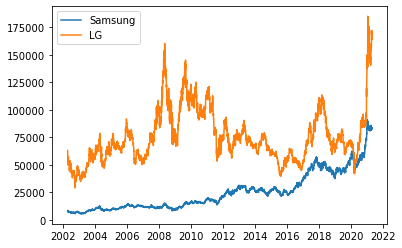

In [92]:
plt.plot(df_merged['samsung'], label='Samsung')
plt.plot(df_merged['lg'], label='LG')
plt.legend()
plt.show()

### 2. Normalize the stock prices for a fair comparison

In [95]:
first_date = df_merged.index[0]

In [96]:
init_prices = df_merged.loc[first_date]

In [97]:
init_prices

samsung     8200.0
lg         62936.0
Name: 2002-04-22 00:00:00, dtype: float64

In [98]:
df_merged['samsung_norm'] = df_merged['samsung'] / init_prices.samsung * 100

In [99]:
df_merged['lg_norm'] = df_merged['lg'] / init_prices.lg * 100

In [100]:
df_merged.head()

,samsung,lg,samsung_norm,lg_norm
date,,,,
2002-04-22,8200,62936.0,100.000000,100.000000
2002-04-23,8540,57463.0,104.146341,91.303864
2002-04-24,8640,55704.0,105.365854,88.508961
2002-04-25,8260,51209.0,100.731707,81.366785
2002-04-26,8000,53554.0,97.560976,85.092793


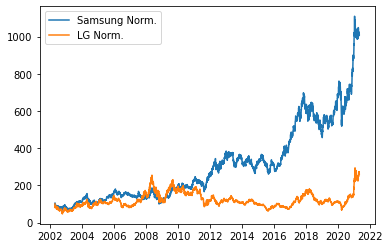

In [101]:
plt.plot(df_merged['samsung_norm'], label='Samsung Norm.')
plt.plot(df_merged['lg_norm'], label='LG Norm.')
plt.legend()
plt.show()